In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import sys
from rdp import rdp
from sklearn.cluster import DBSCAN
from tqdm import tqdm
import seaborn


### Data Import
If you need to create a unified dataset run data below.
function;
The below function will go through each data file in Geolife Trajectories 1.3 file. Function label each import with the user it came from. It then save the new data to the file "totalDataSetLocaiton.csv".


In [3]:
fileLocation = "./data/Geolife Trajectories 1.3/Data"
totalDataset = pd.DataFrame()

In [4]:
alluserInfo = []
for folder in os.listdir(fileLocation):
    for day in os.listdir(os.path.join(fileLocation,folder,"Trajectory/")):
        user = pd.read_csv(os.path.join(fileLocation,folder,"Trajectory/",day), skiprows=6, names= ["lat","long","zero","altitude","timeValue","date", "time"], dtype={"lat":np.float64,"long":np.float64,"altitude":np.float64,"timeValue":np.float64})
        user['userNumber'] = pd.Series([folder for x in range(len(user.index))])
        alluserInfo.append(user)

totalDataset = pd.concat(alluserInfo)
totalDataset.head()

,lat,long,zero,altitude,timeValue,date,time,userNumber
0,39.974967,116.329317,0,157.480315,39573.596366,2008-05-05,14:18:46,053
1,39.975250,116.338183,0,141.076115,39573.597708,2008-05-05,14:20:42,053
2,39.975417,116.339017,0,236.220472,39573.598137,2008-05-05,14:21:19,053
3,39.975250,116.342700,0,239.501312,39573.598634,2008-05-05,14:22:02,053
4,39.975333,116.344917,0,239.501312,39573.598854,2008-05-05,14:22:21,053


In [5]:
totalDataset["datetime"] = pd.to_datetime(totalDataset['date'] + ' ' + totalDataset['time'])
totalDataset["timestamp"] = totalDataset['datetime'].apply(lambda x: x.timestamp())
totalDataset["latlongtime"] = totalDataset[['lat','long','timestamp']].values.tolist()

In [6]:
totalDataset.to_csv("./data/totalDataSetLocation.csv")

In [7]:
totalDatset = pd.read_csv("./data/totalDataSetLocation.csv")
totalDatset.describe()

,Unnamed: 0,lat,long,zero,altitude,timeValue,userNumber,timestamp
count,2.487698e+07,2.487698e+07,2.487698e+07,24876978.0,2.487698e+07,2.487698e+07,2.487698e+07,2.487698e+07
mean,3.652884e+03,3.897989e+01,1.123597e+02,0.0,5.130172e+02,3.999910e+04,7.660328e+01,1.246761e+09
std,7.039163e+03,4.070501e+00,2.717960e+01,0.0,2.301976e+03,3.751504e+02,5.672404e+01,3.241299e+07
min,0.000000e+00,1.044024e+00,-1.799696e+02,0.0,-3.264760e+04,3.652697e+04,0.000000e+00,9.467683e+08
25%,4.540000e+02,3.990636e+01,1.163065e+02,0.0,7.870000e+01,3.976056e+04,2.500000e+01,1.226151e+09
50%,1.406000e+03,3.997498e+01,1.163342e+02,0.0,1.476000e+02,3.989141e+04,6.600000e+01,1.237456e+09
75%,3.661000e+03,3.999848e+01,1.164194e+02,0.0,2.190000e+02,4.002956e+04,1.350000e+02,1.249392e+09
max,9.264400e+04,4.001667e+02,1.799969e+02,0.0,1.075033e+05,4.111736e+04,1.810000e+02,1.343378e+09


Error in callback <function _draw_all_if_interactive at 0x7fd26b5ecaf0> (for post_execute):


KeyboardInterrupt: 

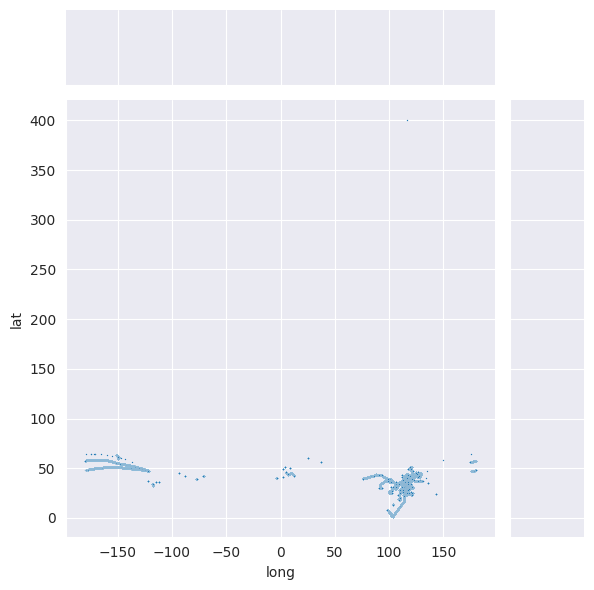

In [8]:
seaborn.jointplot(x='long', y='lat', data=totalDatset, kind = "scatter" , s=1)

### Find Location
Plan;
I know data is collected at a frequency of 1-5 seconds or ever 5~10 meters. So if a location is report for more than 3 minutes within 10 meters we can assume the user stoped her for a prolong period of time. I would expect at least 3 different poi per day. Of course this is recorded before covid so we assume user will not be working from home so they have more points of interest. I will aim for at least 3 different poi per user per day using this standard.

Assumptions:
A possible point of interest is define as a user stopping in a 10 meter radius for more then 3 minues. We will see how many poi frequency.

Plan1 - so we will use ramer-douglas-peucker to minimize the amount of points. This will then be will then minimize the total amountof points. allow me to the calculate time at each point.
plan2 - clustering the points

- So I really want to see first if i can

In [5]:
totalDataset.head()

,lat,long,zero,altitude,timeValue,date,time,userNumber,datetime,timestamp,latlongtime
0,39.974967,116.329317,0,157.480315,39573.596366,2008-05-05,14:18:46,053,2008-05-05 14:18:46,1.209997e+09,"[39.9749666666667, 116.329316666667, 120999712..."
1,39.975250,116.338183,0,141.076115,39573.597708,2008-05-05,14:20:42,053,2008-05-05 14:20:42,1.209997e+09,"[39.97525, 116.338183333333, 1209997242.0]"
2,39.975417,116.339017,0,236.220472,39573.598137,2008-05-05,14:21:19,053,2008-05-05 14:21:19,1.209997e+09,"[39.9754166666667, 116.339016666667, 120999727..."
3,39.975250,116.342700,0,239.501312,39573.598634,2008-05-05,14:22:02,053,2008-05-05 14:22:02,1.209997e+09,"[39.97525, 116.3427, 1209997322.0]"
4,39.975333,116.344917,0,239.501312,39573.598854,2008-05-05,14:22:21,053,2008-05-05 14:22:21,1.209997e+09,"[39.9753333333333, 116.344916666667, 120999734..."


In [15]:
limiteduserInfo = []



for name, uday in tqdm(totalDataset.groupby(["userNumber"])):
    userDay = pd.DataFrame(rdp(list(uday.latlongtime), epsilon=0.001), columns=["lat","long","time"])
    userDay['userNumber'] = pd.Series([name[0] for x in range(len(userDay.index))])
    limiteduserInfo.append(userDay)

limtedDataSet = pd.concat(limiteduserInfo)



  0%|          | 0/182 [00:00<?, ?it/s]/home/tristan/Documents/urba/lib/python3.10/site-packages/tqdm/std.py:1195: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
 23%|██▎       | 41/182 [1:45:33<6:03:02, 154.49s/it]


KeyboardInterrupt: 

In [9]:
limitedFullDataSet = totalDatset[['lat','long']].copy()

In [10]:
graphdataFB = limitedFullDataSet[(limitedFullDataSet.lat > 38) & (limitedFullDataSet.lat < 41)]


In [11]:
graphdataFB = graphdataFB[(graphdataFB.long > 114) & (graphdataFB.long < 118)]

In [14]:
graphdataFB.describe()

,lat,long
count,2.063470e+07,2.063470e+07
mean,3.996916e+01,1.163721e+02
std,1.958688e-01,2.244801e-01
min,3.800001e+01,1.140001e+02
25%,3.994554e+01,1.163164e+02
50%,3.997772e+01,1.163378e+02
75%,3.999969e+01,1.164165e+02
max,4.100000e+01,1.180000e+02


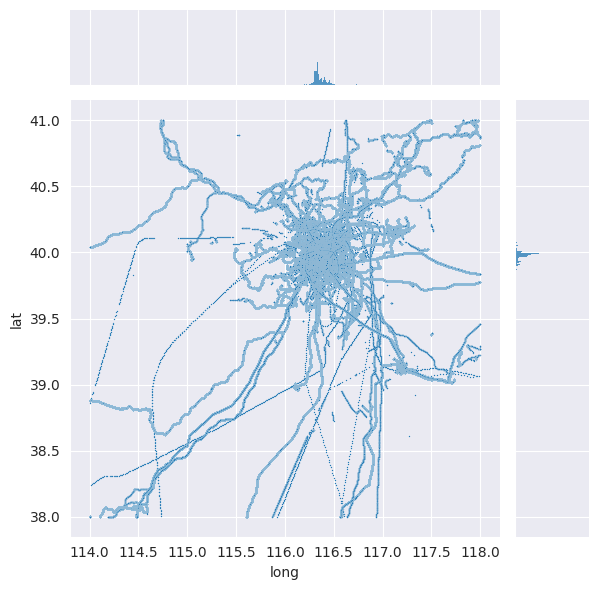

In [13]:
seaborn.jointplot(x='long', y='lat', data=graphdataFB, kind = "scatter" , s=1)

This should allow use to create easy to plot trajectories. otherwise having to run a lot of data.

In [8]:
limtedDataSet.to_csv("./data/limtedDataSet.csv")

In [ ]:
limtedDataSet.describe()

So i have a smaller dataset now to user the DBSCAN clustering alorithm on.

min_samples = 2 - assuming people odnt spend hte whole day at home so should have at least 2 poin of interest on any given day. This should give enough POI to work with

So maybe i will get better resolts

In [ ]:
for name, user in tqdm(totalDataset.groupby(["userNumber"]))    :
    clustering = DBSCAN(eps=3, min_samples=2).fit(list(user.latlongtime))
    labels = clustering.labels_
    break
